In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
path=r"titanic_train.csv"
dia=pd.read_csv(path)
dia.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
dia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dia.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dia.isnull().values.any()

True

In [6]:
dia.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
dia.shape

(891, 12)

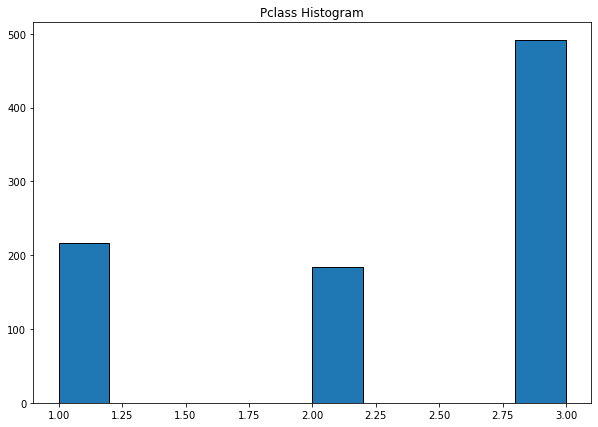

In [7]:
plt.figure(figsize=(10,7))
plt.hist(dia['Pclass'],edgecolor='k')
plt.title("Pclass Histogram")
plt.show()

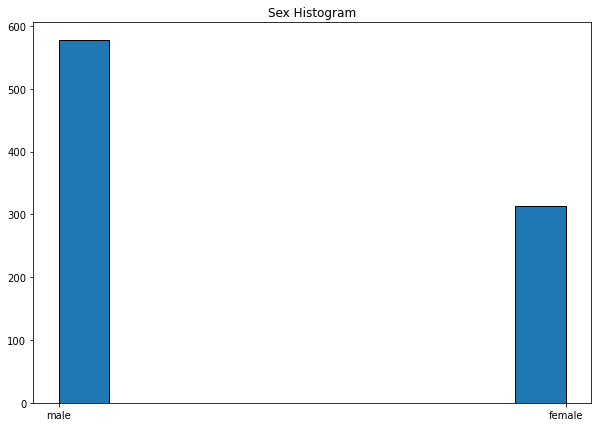

In [8]:
plt.figure(figsize=(10,7))
plt.hist(dia['Sex'],edgecolor='k')
plt.title("Sex Histogram")
plt.show()

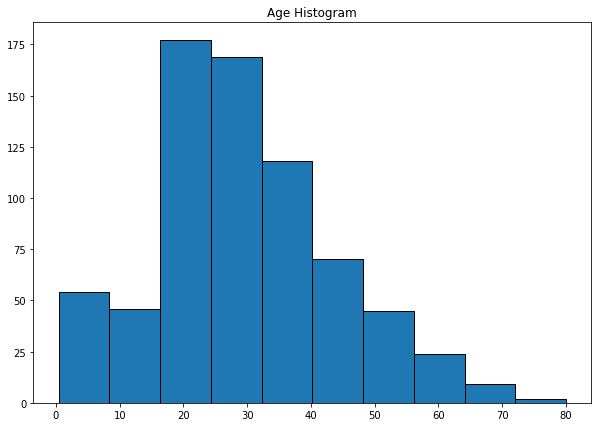

In [9]:
plt.figure(figsize=(10,7))
plt.hist(dia['Age'],edgecolor='k')
plt.title("Age Histogram")
plt.show()

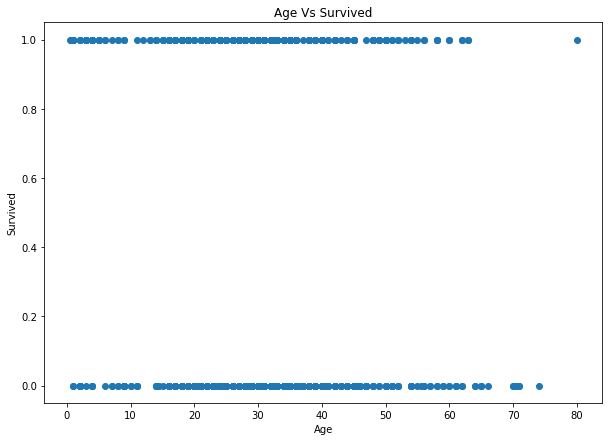

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(dia['Age'],dia['Survived'])
plt.title('Age Vs Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [11]:
dia

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
dia.drop('Name',axis=1,inplace=True)

In [13]:
dia.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
dia.drop(['Sex','Embarked','Cabin','Ticket'],axis=1,inplace=True)

In [15]:
dia.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [16]:
def remove_outlier(dataframe):
    for c_name in dataframe.columns :
        q1=dia[c_name].quantile(0.25)
        q2=dia[c_name].quantile(0.75)
        IQR = q2-q1
        Lower_limit=q1-1.5*IQR
        upper_limit=q2+1.5*IQR
        print(f"{c_name}>>Lower limit :{Lower_limit} \n upper limit : {upper_limit}")
        dataframe=dataframe[(dataframe[c_name]> Lower_limit)|(dataframe[c_name]<upper_limit)]
        
    return dataframe    

In [17]:
dia=remove_outlier(dia)

PassengerId>>Lower limit :-444.0 
 upper limit : 1336.0
Survived>>Lower limit :-1.5 
 upper limit : 2.5
Pclass>>Lower limit :0.5 
 upper limit : 4.5
Age>>Lower limit :-6.6875 
 upper limit : 64.8125
SibSp>>Lower limit :-1.5 
 upper limit : 2.5
Parch>>Lower limit :0.0 
 upper limit : 0.0
Fare>>Lower limit :-26.724 
 upper limit : 65.6344


In [18]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 7 to 885
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  193 non-null    int64  
 1   Survived     193 non-null    int64  
 2   Pclass       193 non-null    int64  
 3   Age          193 non-null    float64
 4   SibSp        193 non-null    int64  
 5   Parch        193 non-null    int64  
 6   Fare         193 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 12.1 KB


In [19]:
x=dia.drop('Survived',axis=1)
y=pd.DataFrame(dia['Survived'])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.13,random_state=1)

In [21]:
print(x_train.shape)
print(x_test.shape)

(167, 6)
(26, 6)


In [22]:
sc=StandardScaler()
sc.fit(x_train)
sc.transform(x_train)
sc.transform(x_test)

array([[-1.00423755,  0.96864699,  1.10734435, -0.88768714, -0.66306498,
        -0.71165701],
       [-0.52751778, -1.35889327,  0.99043766, -0.16454688, -0.66306498,
         1.07072232],
       [ 1.17616927, -0.19512314, -1.30853236, -0.16454688, -0.66306498,
        -0.62549215],
       [-1.12146372,  0.96864699,  1.28270438, -0.16454688,  2.5937542 ,
        -0.43608153],
       [ 1.55520056,  0.96864699, -0.821616  , -0.16454688, -0.66306498,
        -0.61495017],
       [-1.54738548, -0.19512314, -1.05542938, -0.16454688,  0.42254141,
        -0.4382018 ],
       [ 0.44155192,  0.96864699,  0.34745088, -0.88768714,  2.5937542 ,
        -0.53255373],
       [-0.31260313,  0.96864699, -1.17233607,  1.28173362, -0.66306498,
        -0.53255373],
       [ 0.29306543, -0.19512314, -0.00326919,  0.55859337, -0.66306498,
        -0.66789751],
       [ 1.47314224, -0.19512314, -1.29917982, -0.16454688, -0.66306498,
        -0.56541788],
       [ 1.41843669, -0.19512314,  0.46435757, -0.

# Logistic Regression

In [23]:
lor=LogisticRegression()
lor.fit(x_train,y_train)
predict=pd.DataFrame({'Survived':lor.predict(x_test)})
accur=lor.score(x_test,y_test)*100
print(accur,'%')

C:\Users\milan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


76.92307692307693 %


# SVM

In [24]:
cls_svm=SVC(kernel='rbf')
cls_svm.fit(x_train,y_train)
predict=pd.DataFrame({'Survived':cls_svm.predict(x_test)})
accur2=cls_svm.score(x_test,y_test)*100
print(accur2,'%')


C:\Users\milan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


53.84615384615385 %


# Decision Tree

In [25]:
d_t=DecisionTreeClassifier(criterion='gini')
d_t.fit(x_train,y_train)
predict=pd.DataFrame({'Survived':d_t.predict(x_test)})
accur3=d_t.score(x_test,y_test)*100
print(accur3,'%')


73.07692307692307 %


# Knn

In [26]:
knnclass=KNeighborsClassifier(n_neighbors=5)
knnclass.fit(x_train,y_train)
predict=pd.DataFrame({'Survived':knnclass.predict(x_test)})
accur4=knnclass.score(x_test,y_test)*100
print(accur4,'%')


C:\Users\milan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


50.0 %


# Naive Bayes

In [27]:
n_b=GaussianNB()
n_b.fit(x_train,y_train)
predict=pd.DataFrame({'Survived':n_b.predict(x_test)})
accur5=n_b.score(x_test,y_test)*100
print(accur5,'%')


73.07692307692307 %


C:\Users\milan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Random Forest

In [28]:
r_f=RandomForestClassifier(n_estimators=100,criterion='gini')
r_f.fit(x_train,y_train)
predict=pd.DataFrame({'Survived':r_f.predict(x_test)})
accur6=r_f.score(x_test,y_test)*100
print(accur6,'%')


C:\Users\milan\AppData\Local\Temp/ipykernel_6196/2733791483.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_f.fit(x_train,y_train)


80.76923076923077 %
